# Problem Statement: Classifying the sunglasses and eyeware on Salman Khan's Face

Here I have created a 5 layer CNN model to classify the sunglasses and eyeware into three categories:
(i)Club Master 
(ii)Full rim 
(iii)Way Farer

In [1]:
##Import the required libraries

#Sequential the model we use for CNN
from keras.models import Sequential

#Convolution and MaxPooling for feature extraction
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D

#Flatten - To convert the tensor or matrix into single dimension or single row
from keras.layers import Flatten

#Dense - for creating a fully connected ANN
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Instantiating the model for CNN
classifier = Sequential()

In [3]:
##Adding a convolutional layer with argments(no of filters 32, filter or kernel size = (3,3), input_shape of the image(150,150,3 as it a colour image), activation function) 
classifier.add(Conv2D(32,(3,3),input_shape = (150,150,3), activation = 'relu'))

## Add a Pooling layer. Pooling is then used to reduce the spatial dimensions of the output of the Conv2d layer by considering the max value in each kernel or window.
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Adding an another Convolutional and Pooling layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Adding an another Convolutional and Pooling layer
classifier.add(Conv2D(128,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
##Adding a Flatten layer to flatten out the output of the convolution layers.
classifier.add(Flatten())

In [5]:
##Creating a fully connected artificial neural network by adding Dense layers. In this model, we have 5 layers (three convolution layers , one hidden dense layer and one output layer. 
classifier.add(Dense(units = 128, activation = 'relu'))

In [6]:
#Add an other dense (output) layer.In the output layer, the number of neurons should be equal to the number of classes in our data. The activation function used is softmax as it is a multi-class classification.
classifier.add(Dense(units = 3, activation = 'softmax'))

In [7]:
## Here we are compliling our model using appropriate optimizer(I have used adam in this case), defining loss function(categorical_crossentropy as it is a multi-class classifier), metrics(I have used accuracy as a performance measure) 
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
##Applying transforming and scaling the train data to be imported
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
train_datagen

In [10]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
#Here I am only using around 200 images for training and testing to reduce the computational time since I dont have a high end system and also because the accuracy obtained with this model is high.

In [15]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\Jio\\train',
                                               target_size=(150, 150),
                                               batch_size=6,
                                               class_mode='categorical')

Found 57 images belonging to 3 classes.


In [16]:
train_set

In [45]:
#To see which label belongs to which class

In [19]:
train_set.class_indices

{'club_master': 0, 'full_rim': 1, 'wayfarer': 2}

In [20]:
## Importng test data
test_set = test_datagen.flow_from_directory('C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\Jio\\Salman\\test',
                                            target_size=(150, 150),
                                            batch_size=6,
                                            class_mode='categorical')

Found 25 images belonging to 3 classes.


In [21]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=25)


Epoch 1/5
50/50 [==============================] - 40s 797ms/step - loss: 0.6959 - accuracy: 0.6913 - val_loss: 0.0204 - val_accuracy: 0.9200
Epoch 2/5
50/50 [==============================] - 32s 633ms/step - loss: 0.2389 - accuracy: 0.9130 - val_loss: 1.8716e-05 - val_accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 31s 622ms/step - loss: 0.1332 - accuracy: 0.9562 - val_loss: 1.4305e-06 - val_accuracy: 1.0000
Epoch 4/5
50/50 [==============================] - 31s 620ms/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 1.3351e-04 - val_accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 31s 627ms/step - loss: 0.0335 - accuracy: 0.9866 - val_loss: 0.0013 - val_accuracy: 1.0000


In [46]:
#Running an inference using a single test image which has not been used for train or testing to check if the model is predicting correctly.

In [34]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\Jio\\sunglass\\461.0.jpeg'
                           ,target_size =(150,150))

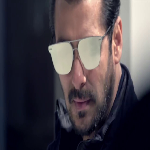

In [35]:
test_image

In [36]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [37]:
test_image.shape

(150, 150, 3)

In [47]:
#The model expects the data to be a 4 dimensional image, hence reshaping the test image.

In [38]:
test_image=test_image.reshape(1,150, 150, 3)

In [ ]:
#Using the trained model to predict the outcome.

In [39]:
result = classifier.predict(test_image)

In [40]:
np.around(result)

array([[1., 0., 0.]], dtype=float32)

In [41]:
 result=result.argmax()

In [42]:
result

0

In [43]:
## Converting the classes of the data into labels.

if result == 0:
    prediction = 'club master'
elif result == 1:
   prediction = 'full rim'
else:
    prediction = 'Way farer'

In [44]:
prediction

'club master'

In [ ]:
#saving my model and serializing the weights for future use

In [50]:
model_json = classifier.to_json()
with open("jiocasestudy.json","w") as json_file:
    json_file.write(model_json)
classifier.save_weights("jiocasestudy.h5")
print("Saved model to disk")

Saved model to disk
